<a href="https://colab.research.google.com/github/ahmadi791/BPB-Worker-Panel/blob/main/MlMidterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q4) A and B

In [1]:
# Part A: Loading and Splitting the Forest Cover Type Dataset

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split

# Load a subset of the forest cover type dataset
print("Loading the forest cover type dataset...")
forest_data = fetch_covtype(as_frame=True)
X = forest_data.data
y = forest_data.target

# Take only a subset of the data to reduce computational load
# Using 10% of the original dataset
X_subset, _, y_subset, _ = train_test_split(X, y, test_size=0.9, random_state=42)

print(f"Original dataset shape: {X.shape}")
print(f"Subset shape: {X_subset.shape}")

# Split the subset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_subset, y_subset, test_size=0.2, random_state=42, stratify=y_subset
)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# Display class distribution in the training set
unique_classes, class_counts = np.unique(y_train, return_counts=True)
print("\nClass distribution in training set:")
for cls, count in zip(unique_classes, class_counts):
    print(f"Class {cls}: {count} samples ({count/len(y_train)*100:.2f}%)")

# Save the prepared datasets for later use
print("\nData preparation completed!")


Loading the forest cover type dataset...
Original dataset shape: (581012, 54)
Subset shape: (58101, 54)
Training set shape: (46480, 54)
Testing set shape: (11621, 54)

Class distribution in training set:
Class 1: 17137 samples (36.87%)
Class 2: 22502 samples (48.41%)
Class 3: 2883 samples (6.20%)
Class 4: 225 samples (0.48%)
Class 5: 715 samples (1.54%)
Class 6: 1395 samples (3.00%)
Class 7: 1623 samples (3.49%)

Data preparation completed!


Q2)B)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Logistic Regression Results:
Accuracy: 0.6869
Precision: 0.6542
Recall: 0.6869
F1 Score: 0.6639


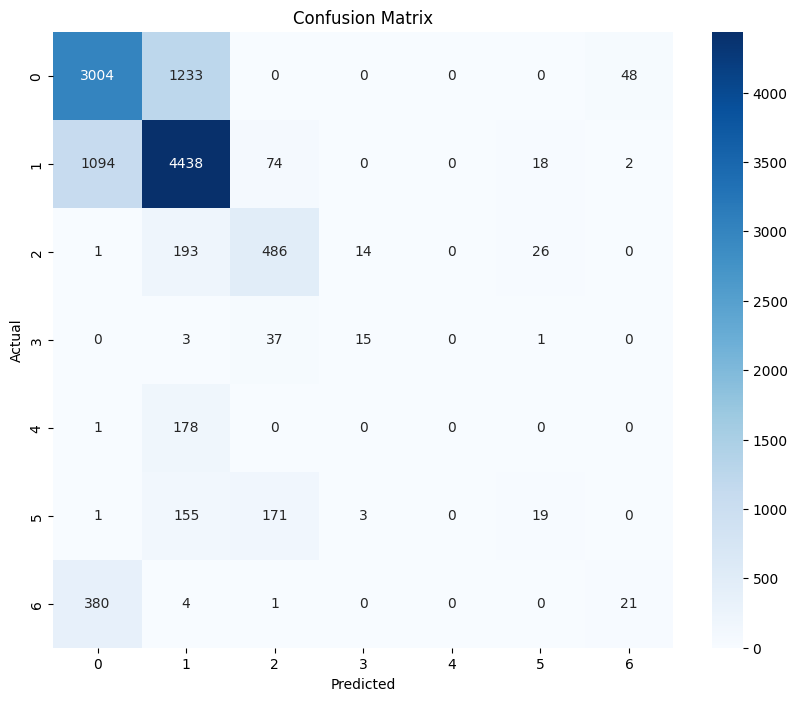

NameError: name 'classification_report' is not defined

In [2]:
# Part B: Implementation of Linear Classifier (Logistic Regression)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the training data
log_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = log_reg.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display results
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Performance analysis for each class
class_report = classification_report(y_test, y_pred, output_dict=True)
for cls in class_report:
    if cls not in ['accuracy', 'macro avg', 'weighted avg']:
        print(f"Class {cls}:")
        print(f"Precision: {class_report[cls]['precision']:.4f}")
        print(f"Recall: {class_report[cls]['recall']:.4f}")
        print(f"F1 Score: {class_report[cls]['f1-score']:.4f}")
        print()


Q4) C

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Step 1: Train a Decision Tree model
# Initialize the decision tree classifier
tree_model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
tree_model.fit(X_train, y_train)

# Step 2: Evaluate the Decision Tree model
# Make predictions on the test data
y_pred_tree = tree_model.predict(X_test)

# Calculate evaluation metrics
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree, average='weighted')
recall_tree = recall_score(y_test, y_pred_tree, average='weighted')
f1_tree = f1_score(y_test, y_pred_tree, average='weighted')

# Print evaluation results for Decision Tree
print("Decision Tree Results:")
print("Confusion Matrix:\n", conf_matrix_tree)
print("Accuracy:", accuracy_tree)
print("Precision:", precision_tree)
print("Recall:", recall_tree)
print("F1 Score:", f1_tree)

# Step 3: Analyze the impact of hyperparameters on Decision Tree
# Experiment with different max_depth values
for max_depth in [5, 10, 15]:
    tree_model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    tree_model.fit(X_train, y_train)
    y_pred = tree_model.predict(X_test)
    print(f"\nDecision Tree with max_depth={max_depth}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))


Q5) A)

In [1]:
import gdown
import pandas as pd
import numpy as np

# Step 1: Define the Google Drive file ID or URL
file_id = "your_file_id"  # Replace with your file ID
file_name = "dataset.csv"  # Desired name for the downloaded file
#rl = f"https://drive.google.com/uc?id={file_id}"
url = "https://drive.google.com/file/d/1Eo6S0PdLyJ1TuwH1cw15-hw0VTpCxauS/view?usp=drivesdk"
# Step 2: Download the file using gdown
print("Downloading file from Google Drive...")
gdown.download(url, file_name, quiet=False)
print(f"File downloaded as: {file_name}")

# Step 3: Load the dataset using pandas
try:
    # Specify the correct delimiter (e.g., comma, semicolon, or tab)
    data = pd.read_csv(file_name, delimiter='\t')  # Change this if needed
    print("\nDataset loaded successfully!")
except Exception as e:
    print(f"Error loading dataset: {e}")
    exit()

# Step 4: Separate features and labels
try:
    # Assuming columns 'acc_x', 'acc_y', 'acc_z' are features and 'class' is the label
    X = data[[1,2,3]].values  # Features
    y = data['label'].values  # Labels
except KeyError as e:
    print(f"Error: Missing required columns in the dataset. {e}")
    exit()

# Step 5: Print the loaded data to confirm
print("\nFirst 5 rows of Features (X):")
print(X[:5])
print("\nFirst 5 Labels (y):")
print(y[:5])

# Print shapes of the arrays
print("\nFeatures Shape:", X.shape)
print("Labels Shape:", y.shape)


/usr/local/lib/python3.11/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1Eo6S0PdLyJ1TuwH1cw15-hw0VTpCxauS
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1Eo6S0PdLyJ1TuwH1cw15-hw0VTpCxauS/view?usp=drivesdk
To: /content/dataset.csv
39.8kB [00:00, 9.84MB/s]


File downloaded as: dataset.csv

Dataset loaded successfully!
Error: Missing required columns in the dataset. "None of [Index([1, 2, 3], dtype='int64')] are in the [columns]"

First 5 rows of Features (X):


NameError: name 'X' is not defined

In [ ]:
import numpy as np
from collections import Counter
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

# Function to calculate Euclidean distance
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# k-Nearest Neighbors algorithm
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        # Store training data
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

    def _predict(self, x):
        # Calculate distances from x to all training points
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Get the indices of the k-nearest neighbors
        k_indices = np.argsort(distances)[:self.k]
        # Get the labels of the k-nearest neighbors
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Return the most common label (majority voting)
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

# Load dataset (replace this with your dataset loading code)
# For simplicity, we generate a dataset here
np.random.seed(42)
              # 3 features (acc_x, acc_y, acc_z)
 # 3 classes: 0 (vertical),
# Split dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the kNN model
k = 3  # Example: k=3
knn = KNN(k=k)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate and report metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
